In [ ]:
Miraslau Alkhovik, 248655, EAiBD gr. 2, EDA

# Wstęp

Globalna epidemia HIV i AIDS stanowi poważne wyzwanie dla systemów zdrowia publicznego nie tylko na całym świecie, ale także w Polsce. Chociaż postępy w medycynie poprawiły prognozowanie dla osób zakażonych wirusem HIV, regionalne różnice w dynamice transmisji i postępie choroby pozostają kluczowymi obszarami do badań. Analiza tej dynamiki w różnych regionach może zapewnić wgląd w ukierunkowane strategie profilaktyczne i planowanie zdrowotne.

Niniejsza analiza koncentruje się na polskich województwach: kujawsko-pomorskim i zachodniopomorskim; które zostały zidentyfikowane jako regiony o kontrastujących tendencjach w zakresie zakażeń HIV i AIDS. Analizując standaryzowane różnice, drogi zakażenia, wzorce transmisji płci i dane szeregów czasowych, badanie to ma na celu zidentyfikowanie korelacji i wyciągnięcie wniosków, które mogą wpłynąć na politykę zdrowia publicznego i alokację zasobów.

Wykorzystując wizualizację i analizy statystyczne, analiza odpowiada na kluczowe pytania:

1. Сo odpowiada za znaczące różnice w rozwoju HIV/AIDS pomiędzy tymi regionami?
2. W jaki sposób płeć i sposoby przenoszenia wirusa wpływają na dynamikę zakażeń?
3. Сzy istnieją obserwowalne trendy, które wskazują na potencjalne punkty interwencji?

Celem niniejszej analizy jest dostarczenie praktycznych informacji na temat łagodzenia skutków HIV i AIDS w Polsce.


## Import danych

Dane wykorzystane w analizie pochodzą z trzech głównych źródeł:

- **Dane HIV**: [EpiBaza PZH - Zestawienie przypadków HIV](https://epibaza.pzh.gov.pl/dataset/hivaids/resource/2beab4be-8fbb-4ebc-b203-04726dfadf97)
- **Dane AIDS**: [EpiBaza PZH - Zestawienie przypadków AIDS](https://epibaza.pzh.gov.pl/dataset/hivaids/resource/1232cce0-e0f5-44dc-b498-fcff34ac7742)
- **Mapa administracyjna**: [Granice administracyjne - GIS Support](https://gis-support.pl/baza-wiedzy-2/dane-do-pobrania/granice-administracyjne/)

Dane dotyczące przypadków HIV i AIDS zostały pobrane z oficjalnych źródeł epidemiologicznych w Polsce, natomiast granice województw do wizualizacji mapy zostały pozyskane z repozytorium GIS Support. Przed przystąpieniem do analizy dane zostały przetworzone za pomocą Power Query w Excelu w celu usunięcia nieścisłości i ujednolicenia formatu.



In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.io as pio
from PIL import Image

In [3]:
hiv_data_path = 'HIV_PQ.xlsx' 
aids_data_path = 'AIDS_PQ.xlsx' 

hiv_df = pd.read_excel(hiv_data_path)
aids_df = pd.read_excel(aids_data_path)

hiv_df_cleaned = hiv_df[
    (hiv_df['województwo'] != 'brak danych') &
    (hiv_df['droga zakażenia'] != 'brak danych') &
    (hiv_df['płeć'] != 'brak danych') &
    (hiv_df['rok rozpoznania'] >= 1999) &
    (hiv_df['rok rozpoznania'] <= 2020)
]
aids_df_cleaned = aids_df[
    (aids_df['województwo'] != 'brak danych') &
    (aids_df['droga zakażenia'] != 'brak danych') &
    (aids_df['płeć'] != 'brak danych') &
    (aids_df['rok rozpoznania'] >= 1999) &
    (aids_df['rok rozpoznania'] <= 2020)
]

hiv_df_cleaned = hiv_df_cleaned.fillna({'licznik': 0, 'rok rozpoznania': 0})
aids_df_cleaned = aids_df_cleaned.fillna({'licznik': 0, 'rok rozpoznania': 0})

hiv_df_cleaned['rok rozpoznania'] = hiv_df_cleaned['rok rozpoznania'].astype(int)
hiv_df_cleaned['licznik'] = hiv_df_cleaned['licznik'].astype(int)
aids_df_cleaned['rok rozpoznania'] = aids_df_cleaned['rok rozpoznania'].astype(int)
aids_df_cleaned['licznik'] = aids_df_cleaned['licznik'].astype(int)


hiv_df_cleaned.to_csv('HIV_CLEANED', index=False)
aids_df_cleaned.to_csv('AIDS_CLEANED', index=False)


print("Wyczyszczone dane zostały zapisane do plików CSV.")

Wyczyszczone dane zostały zapisane do plików CSV.


# Opis danych

## Kluczowe zmienne w danych:
1. **Województwo**: Lokalizacja geograficzna przypadków.
2. **Droga zakażenia**: Mechanizm transmisji, np. wstrzykiwanie narkotyków, kontakty heteroseksualne, kontakty homoseksualne.
3. **Płeć**: Podział na kobiety (K) i mężczyzn (M).
4. **Rok rozpoznania**: Rok zdiagnozowania przypadków.
5. **Licznik**: Liczba przypadków w danej kategorii.

## Podstawowe statystyki:
- Liczba unikalnych województw: 16
- Zakres lat: od 2000 do 2020
- Łączna liczba przypadków HIV: 8092
- Łączna liczba przypadków AIDS: 2482

### Ogólne obserwacje:
- W większości regionów HIV jest diagnozowane znacznie częściej niż AIDS, co może wskazywać na poprawę wczesnej diagnostyki.
- Kujawsko-Pomorskie wyróżnia się wysokim odsetkiem zakażeń związanych z wstrzykiwaniem narkotyków, podczas gdy w Zachodniopomorskim przeważają kontakty heteroseksualne.
- Progresja HIV do AIDS różni się w zależności od regionu, co może wynikać z lokalnych różnic w dostępie do leczenia i edukacji zdrowotnej.

In [4]:
hiv_data = pd.read_csv('HIV_CLEANED')
hiv_data.head()

,licznik,jednostka chorobowa,rok rozpoznania,województwo,płeć,droga zakażenia
0,1,HIV,1999,dolnośląskie,M,wstrzykiwanie narkotyków drogą dożylną
1,1,HIV,1999,dolnośląskie,M,wstrzykiwanie narkotyków drogą dożylną
2,1,HIV,1999,dolnośląskie,M,wstrzykiwanie narkotyków drogą dożylną
3,1,HIV,1999,dolnośląskie,M,wstrzykiwanie narkotyków drogą dożylną
4,1,HIV,1999,śląskie,K,kontakty heteroseksualne


In [5]:
aids_data = pd.read_csv('AIDS_CLEANED')
aids_data.head()

,licznik,jednostka chorobowa,rok rozpoznania,województwo,płeć,droga zakażenia
0,1,AIDS,1999,pomorskie,M,wstrzykiwanie narkotyków drogą dożylną
1,1,AIDS,1999,warmińsko-mazurskie,K,wstrzykiwanie narkotyków drogą dożylną
2,1,AIDS,1999,śląskie,K,wstrzykiwanie narkotyków drogą dożylną
3,1,AIDS,1999,mazowieckie,M,kontakty homoseksualne
4,1,AIDS,1999,kujawsko-pomorskie,K,kontakty heteroseksualne


## Porównanie znormalizowanych dróg transmisji HIV i AIDS

Poniższy wykres radarowy został stworzony, aby przyjrzeć się głównym drogom transmisji HIV i AIDS w Polsce. Dane zostały znormalizowane, aby pokazać udział każdego mechanizmu transmisji w obu kategoriach.

Główne obserwacje.
- Kontakty homo- i heteroseksualne odgrywają dominującą rolę w przenoszeniu HIV, co podkreśla znaczenie edukacji i profilaktyki w tym obszarze.
- Używanie narkotyków drogą iniekcji jest ważną drogą przenoszenia wirusa i jest szczególnie widoczne w kontekście AIDS. Sugeruje to związek między tą drogą transmisji a późniejszą chorobą, prawdopodobnie z powodu braku dostępu do leczenia w tej grupie.

Wykorzystując tę analizę dróg zakażenia jako punkt wyjścia, została pzeprowadzona analiza regionalna i analiza trendów w czasie. Szczególny nacisk położono na te główne mechanizmy transmisji chorób w wybranych województwach.

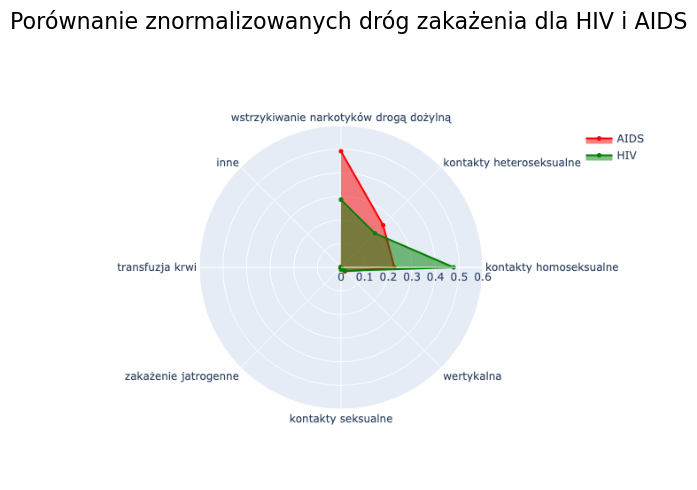

In [7]:
aids_by_infection = aids_data.groupby('droga zakażenia')['licznik'].sum().sort_values(ascending=False)
hiv_by_infection = hiv_data.groupby('droga zakażenia')['licznik'].sum().sort_values(ascending=False)
aids_normalized_infection = aids_by_infection / aids_by_infection.sum()
hiv_normalized_infection = hiv_by_infection / hiv_by_infection.sum()

categories = aids_normalized_infection.index.tolist()
aids_values = aids_normalized_infection.values       
hiv_values = hiv_normalized_infection.reindex(categories, fill_value=0).values 

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=aids_values,
    theta=categories,
    fill='toself',
    name='AIDS',
    line=dict(color='red'),
    marker=dict(size=5)
))

fig.add_trace(go.Scatterpolar(
    r=hiv_values,
    theta=categories,
    fill='toself',
    name='HIV',
    line=dict(color='green'),
    marker=dict(size=5)
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 0.6],
            tickfont=dict(size=12)
        ),
        angularaxis=dict(
            tickfont=dict(size=12),
            direction='clockwise'
        )
    ),

    showlegend=True,
    legend=dict(font=dict(size=12)),
)

pio.write_image(fig, "radar_chart.png", format="png")

img = Image.open("radar_chart.png")
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.title("Porównanie znormalizowanych dróg zakażenia dla HIV i AIDS", fontsize=16)
plt.show()

# Analiza różnic regionalnych: Mapa znormalizowana

Wizualizacja mapy pokazuje znormalizowaną różnicę między przypadkami HIV i AIDS w polskich regionach. Województwo kujawsko-pomorskie wyróżnia się najwyższą dodatnią znormalizowaną różnicą, co wskazuje na znaczny odsetek przypadków HIV, które nie przekształciły się w AIDS w porównaniu z innymi regionami. Jednocześnie województwo zachodniopomorskie wyróżnia się najwyższą ujemną znormalizowaną różnicą, wskazującą na wyższy odsetek przypadków AIDS w stosunku do przypadków HIV.

Rozbieżność ta może odzwierciedlać różnice w dostępie do opieki zdrowotnej, wskaźniki wczesnej diagnostyki lub regionalne różnice w interwencjach w zakresie zdrowia publicznego. Wizualizacja stanowi punkt wyjścia do głębszej analizy czynników wpływających na te różnice, takich jak warunki społeczno-ekonomiczne, edukacja czy infrastruktura zdrowotna.

Dane mapy wczytane poprawnie.


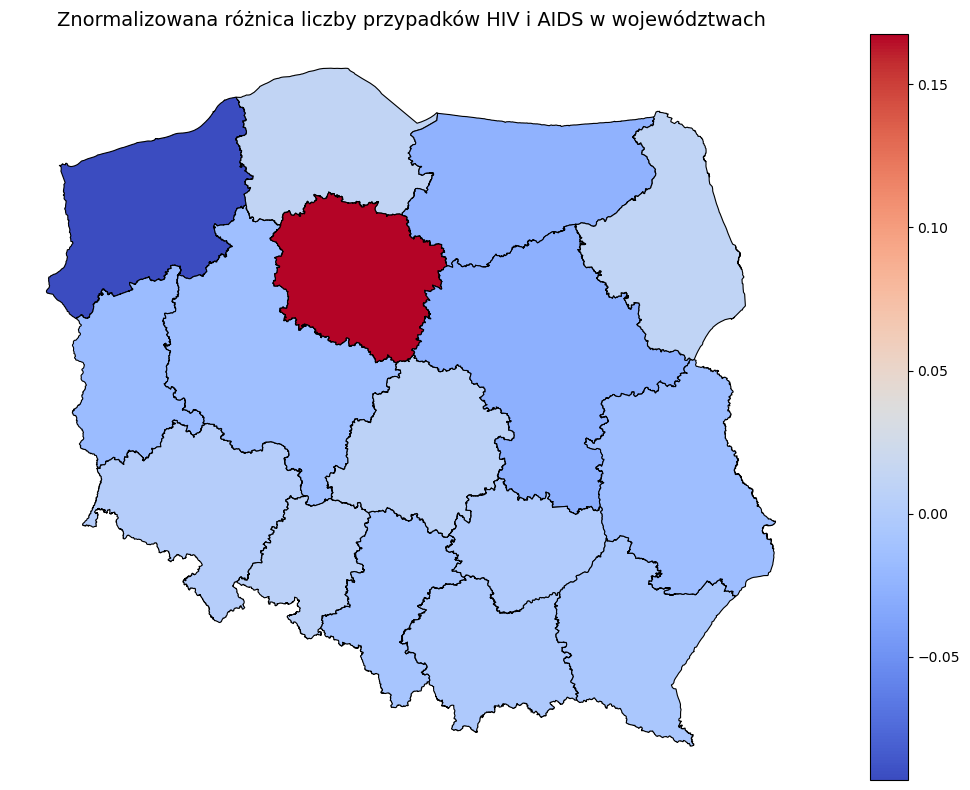

In [23]:
shp_path = 'wojewodztwa.shp'
try:
    map_data = gpd.read_file(shp_path)
    print("Dane mapy wczytane poprawnie.")
except Exception as e:
    print(f"Błąd podczas wczytywania mapy: {e}")
    exit()

wojewodztwa = [
    "dolnośląskie", "kujawsko-pomorskie", "lubelskie", "lubuskie",
    "łódzkie", "małopolskie", "mazowieckie", "opolskie",
    "podkarpackie", "podlaskie", "pomorskie", "śląskie",
    "świętokrzyskie", "warmińsko-mazurskie", "wielkopolskie", "zachodniopomorskie"
]
map_data['województwo'] = wojewodztwa

aids_by_region = aids_data.groupby('województwo')['licznik'].sum().reset_index()
hiv_by_region = hiv_data.groupby('województwo')['licznik'].sum().reset_index()

map_data = map_data.merge(aids_by_region, left_on='województwo', right_on='województwo', how='left')
map_data = map_data.rename(columns={'licznik': 'AIDS_przypadki'})

map_data = map_data.merge(hiv_by_region, left_on='województwo', right_on='województwo', how='left')
map_data = map_data.rename(columns={'licznik': 'HIV_przypadki'})

map_data['AIDS_przypadki'] = map_data['AIDS_przypadki'].fillna(0)
map_data['HIV_przypadki'] = map_data['HIV_przypadki'].fillna(0)

map_data['HIV_minus_AIDS'] = map_data['HIV_przypadki']/map_data['HIV_przypadki'].sum() - map_data['AIDS_przypadki']/map_data['AIDS_przypadki'].sum()

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
map_data.plot(column='HIV_minus_AIDS', 
              cmap='coolwarm', 
              linewidth=0.8, 
              ax=ax, 
              edgecolor='black', 
              legend=True)
ax.set_title('Znormalizowana różnica liczby przypadków HIV i AIDS w województwach', fontsize=14)
ax.set_axis_off()

plt.tight_layout()
plt.show()


# Analiza trendu dróg szerzenia się zakażeń na tle ogólnej liczby zachorowań (HIV i AIDS).

Analiza trendu dróg transmisji bada dynamikę rozprzestrzeniania się HIV i AIDS w województwach kujawsko-pomorskim i zachodniopomorskim. Wizualizacje pokazują czasowy związek między głównymi drogami transmisji a całkowitą liczbą zgłoszonych przypadków (HIV i AIDS łącznie) w czasie.

W województwie kujawsko-pomorskim trend dotyczący dożylnego zażywania narkotyków odzwierciedla ogólny trend dotyczący całkowitej liczby przypadków, podkreślając jego dominującą rolę w napędzaniu epidemii w regionie. Rozpowszechnienie dożylnego zażywania narkotyków wśród mężczyzn dodatkowo podkreśla jego znaczenie jako grupy docelowej dla dostosowanych interwencji, takich jak programy redukcji szkód lub inicjatywy wymiany igieł.

Z drugiej strony w województwie zachodniopomorskim istnieje silna korelacja między kontaktami heteroseksualnymi a całkowitą liczbą zakażeń, a ta droga zakażenia dominuje zarówno wśród mężczyzn, jak i kobiet. Ten wzorzec sugeruje, że strategie profilaktyczne, które koncentrują się na edukacji w zakresie bezpiecznego seksu, powszechnych testach i dostępie do środków profilaktycznych, mogą być szczególnie skuteczne w tym regionie.

Chociaż wykres radarowy pokazuje, że kontakty heteroseksualne, wstrzykiwanie narkotyków drogą dożylną oraz kontakty homoseksualne dominują wśród wszystkich dróg zakażenia, tylko dwie drogi mają znaczący wpływ w tych dwóch województwach. 

Tendencje te nie tylko odzwierciedlają dominujące drogi przenoszenia wirusa, ale także podkreślają znaczenie strategii specyficznych dla danego regionu.

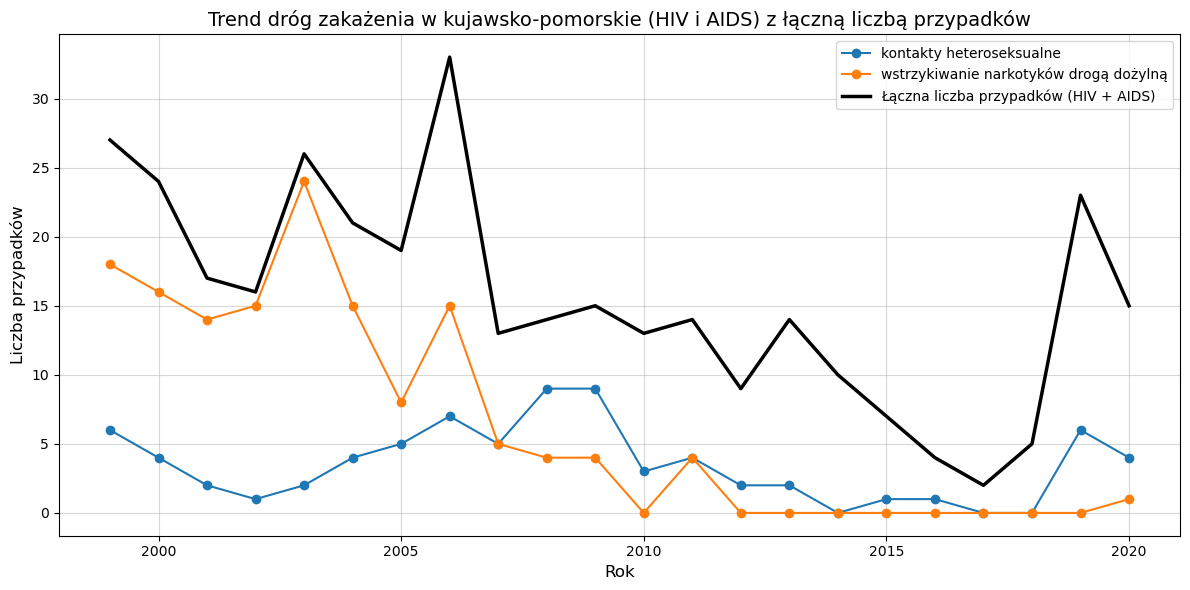

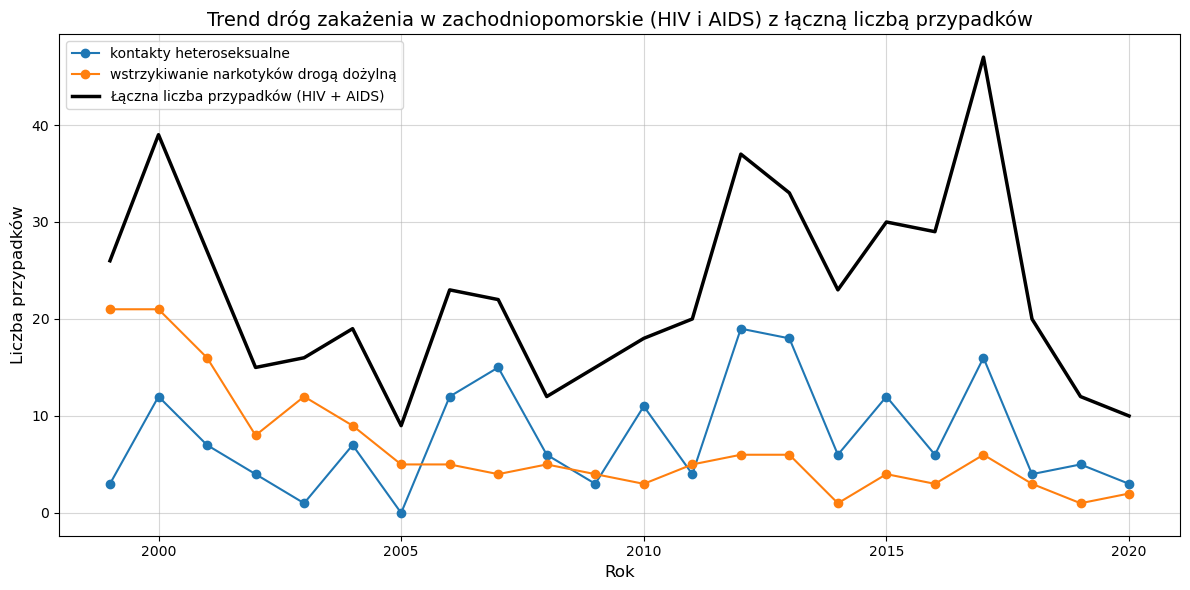

In [9]:
aids_data = pd.read_csv('AIDS_CLEANED')
hiv_data = pd.read_csv('HIV_CLEANED')

regions_of_interest = ["kujawsko-pomorskie", "zachodniopomorskie"]

infection_routes = ['kontakty heteroseksualne', 'wstrzykiwanie narkotyków drogą dożylną']

aids_routes_time = aids_data[aids_data['województwo'].isin(regions_of_interest) &
                             aids_data['droga zakażenia'].isin(infection_routes)]
hiv_routes_time = hiv_data[hiv_data['województwo'].isin(regions_of_interest) &
                           hiv_data['droga zakażenia'].isin(infection_routes)]

aids_routes_time = aids_routes_time.groupby(['rok rozpoznania', 'droga zakażenia', 'województwo'])['licznik'].sum().unstack(level=2).fillna(0)
hiv_routes_time = hiv_routes_time.groupby(['rok rozpoznania', 'droga zakażenia', 'województwo'])['licznik'].sum().unstack(level=2).fillna(0)

combined_routes_time = aids_routes_time.add(hiv_routes_time, fill_value=0)

total_infections_time = aids_data.groupby(['rok rozpoznania', 'województwo'])['licznik'].sum().unstack().fillna(0) + \
                        hiv_data.groupby(['rok rozpoznania', 'województwo'])['licznik'].sum().unstack().fillna(0)

for region in regions_of_interest:
    plt.figure(figsize=(12, 6))

    data = combined_routes_time[region].unstack(level=1)
    total_cases = total_infections_time[region]

    for route in infection_routes:
        plt.plot(data.index, data[route], marker='o', label=route)

    plt.plot(total_cases.index, total_cases.values, color='black', linewidth=2.5, label='Łączna liczba przypadków (HIV + AIDS)')

    plt.title(f'Trend dróg zakażenia w {region} (HIV i AIDS) z łączną liczbą przypadków', fontsize=14)
    plt.xlabel('Rok', fontsize=12)
    plt.ylabel('Liczba przypadków', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()



# Analiza dróg transmisji według płci

Analiza wystandaryzowanych dróg transmisji według płci pokazuje, w jaki sposób mężczyźni i kobiety wpływają na dynamikę rozprzestrzeniania się HIV w województwach kujawsko-pomorskim i zachodniopomorskim.

W województwie kujawsko-pomorskim dożylne zażywanie narkotyków jest główną drogą zakażenia wśród mężczyzn, dominującą w ogólnym wzorcu zakażeń w regionie. Wyraźny kontrast w stosunku liczby mężczyzn do liczby kobiet zakażonych tą drogą wskazuje na potrzebę stosowania środków redukcji szkód uwzględniających płeć, takich jak podnoszenie świadomości i dostępność programów wymiany strzykawek przeznaczonych specjalnie dla mężczyzn.

W województwie zachodniopomorskim kontakty heteroseksualne są dominującą drogą zakażenia zarówno wśród mężczyzn, jak i kobiet. Jednak równowaga płci w tym regionie sugeruje, że ogólne kampanie zdrowia publicznego koncentrujące się na bezpiecznych praktykach seksualnych mogą mieć bardziej uniwersalny efekt. Programy edukacyjne skierowane zarówno do mężczyzn, jak i kobiet mogą być skutecznym środkiem ograniczającym przenoszenie wirusa w tym regionie.

Wyniki te podkreślają ważną rolę, jaką płeć odgrywa w kształtowaniu epidemiologicznego krajobrazu przenoszenia wirusa HIV. Biorąc pod uwagę specyficzne dla płci podatności i wzorce zachowań, polityka zdrowia publicznego może być lepiej dostosowana w celu zmniejszenia liczby nowych zakażeń i leczenia już istniejących.




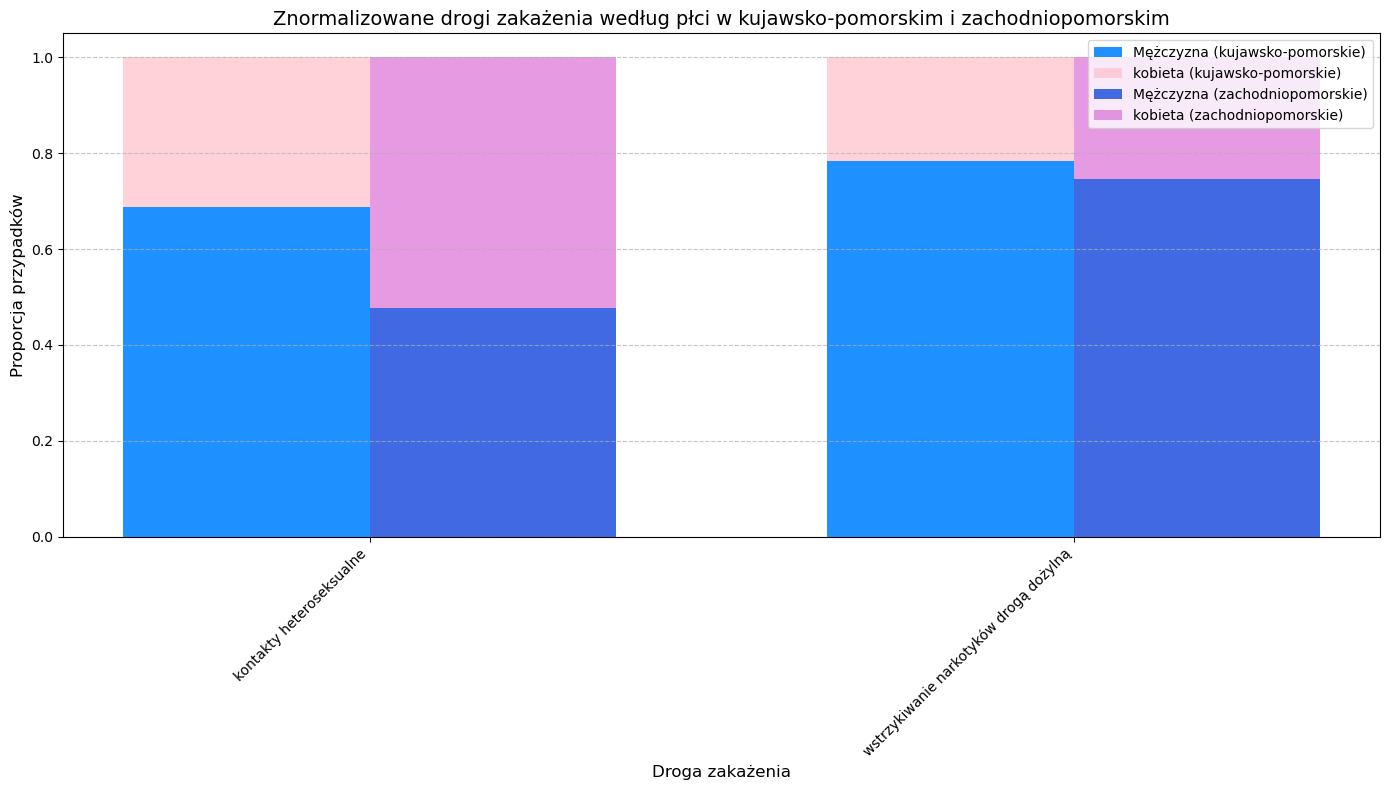

In [38]:
combined_gender_route = (
    aids_data.groupby(['województwo', 'droga zakażenia', 'płeć'])['licznik'].sum().unstack(level=2).fillna(0) +
    hiv_data.groupby(['województwo', 'droga zakażenia', 'płeć'])['licznik'].sum().unstack(level=2).fillna(0)
)

filtered_gender_route = combined_gender_route.loc[
    (slice(None), infection_routes), :
]

region1_data = filtered_gender_route.loc['kujawsko-pomorskie']
region2_data = filtered_gender_route.loc['zachodniopomorskie']

routes = region1_data.index.get_level_values('droga zakażenia')
women1 = region1_data['K']
men1 = region1_data['M']
women2 = region2_data['K']
men2 = region2_data['M']

x = np.arange(len(routes)) 
bar_width = 0.35  

total_cases_region1 = region1_data.sum(axis=1) 
total_cases_region2 = region2_data.sum(axis=1) 

women1_norm = women1 / total_cases_region1
men1_norm = men1 / total_cases_region1
women2_norm = women2 / total_cases_region2
men2_norm = men2 / total_cases_region2

plt.figure(figsize=(14, 8))
plt.bar(x - bar_width / 2, men1_norm, width=bar_width, color='dodgerblue', label='Mężczyzna (kujawsko-pomorskie)')
plt.bar(x - bar_width / 2, women1_norm, width=bar_width, bottom=men1_norm, color='pink', alpha=0.7,
        label='kobieta (kujawsko-pomorskie)')
plt.bar(x + bar_width / 2, men2_norm, width=bar_width, color='royalblue', label='Mężczyzna (zachodniopomorskie)')
plt.bar(x + bar_width / 2, women2_norm, width=bar_width, bottom=men2_norm, color='orchid', alpha=0.7,
        label='kobieta (zachodniopomorskie)')

# Customize plot
plt.title('Znormalizowane drogi zakażenia według płci w kujawsko-pomorskim i zachodniopomorskim', fontsize=14)
plt.xlabel('Droga zakażenia', fontsize=12)
plt.ylabel('Proporcja przypadków', fontsize=12)
plt.xticks(x, routes, rotation=45, ha='right', fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Progresja HIV do AIDS dla dominujących sposobów transmisji

Progresja od HIV do AIDS dla dominujących sposobów transmisji wyjaśnia dynamikę epidemii w województwach kujawsko-pomorskim i zachodniopomorskim. Analiza ta koncentruje się na głównym sposobie transmisji w każdym regionie: dożylnym zażywaniu narkotyków w województwie kujawsko-pomorskim i kontaktach heteroseksualnych w województwie zachodniopomorskim.

W województwie kujawsko-pomorskim obserwuje się stałą tendencję spadkową liczby przypadków HIV związanych z dożylnym przyjmowaniem narkotyków, podczas gdy liczba przypadków AIDS maleje. Sugeruje to poprawę w zakresie wczesnej diagnostyki i leczenia lub potencjalnie skuteczne strategie redukcji szkód skierowane do osób przyjmujących narkotyki drogą iniekcji. Jednak utrzymująca się liczba przypadków podkreśla potrzebę ciągłego wsparcia dla tej grupy wysokiego ryzyka.

W województwie zachodniopomorskim kontakty heteroseksualne są nadal główną przyczyną zakażeń. Progresja od HIV do AIDS nie jest tak szybka jak w województwie kujawsko-pomorskim, co sugeruje, że mogą istnieć luki w szybkiej diagnozie lub dostępie do leczenia dla osób zakażonych w ten sposób. Kampanie zdrowia publicznego podkreślające potrzebę regularnego testowania i wczesnego leczenia mogłyby pomóc w rozwiązaniu tego problemu.

Analizując czasowe trendy w określonych szlakach transmisji, wizualizacje te wskazują na potrzebę ukierunkowanych interwencji dostosowanych do dominującej dynamiki transmisji w każdym regionie. Takie ukierunkowane podejścia pomogą zmniejszyć obciążenie AIDS poprzez przerwanie progresji HIV na wczesnym etapie.

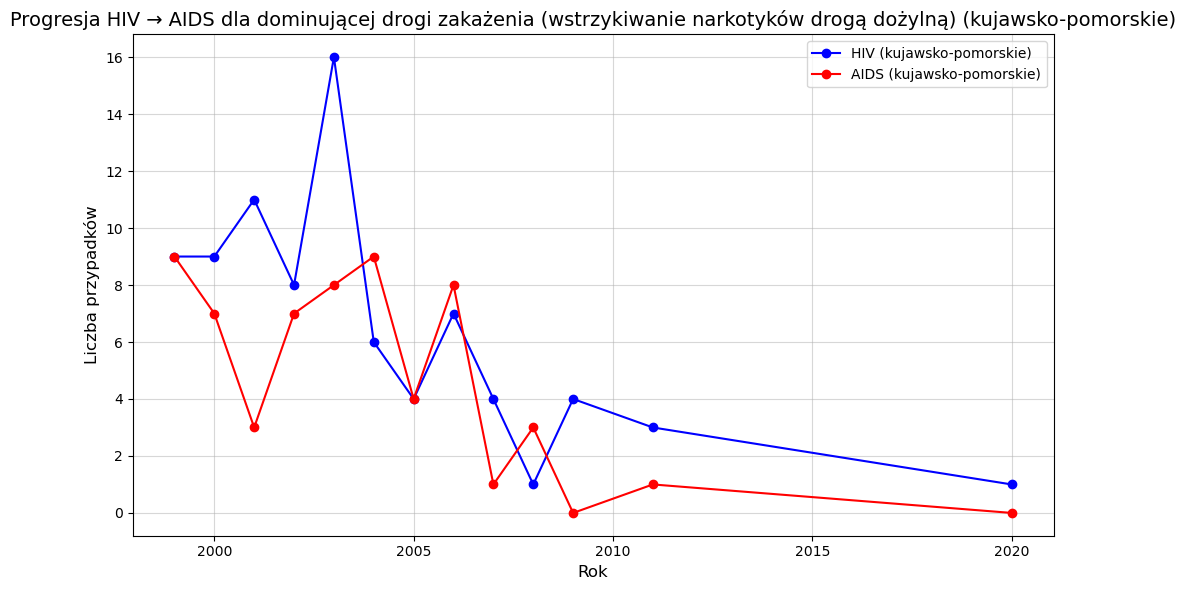

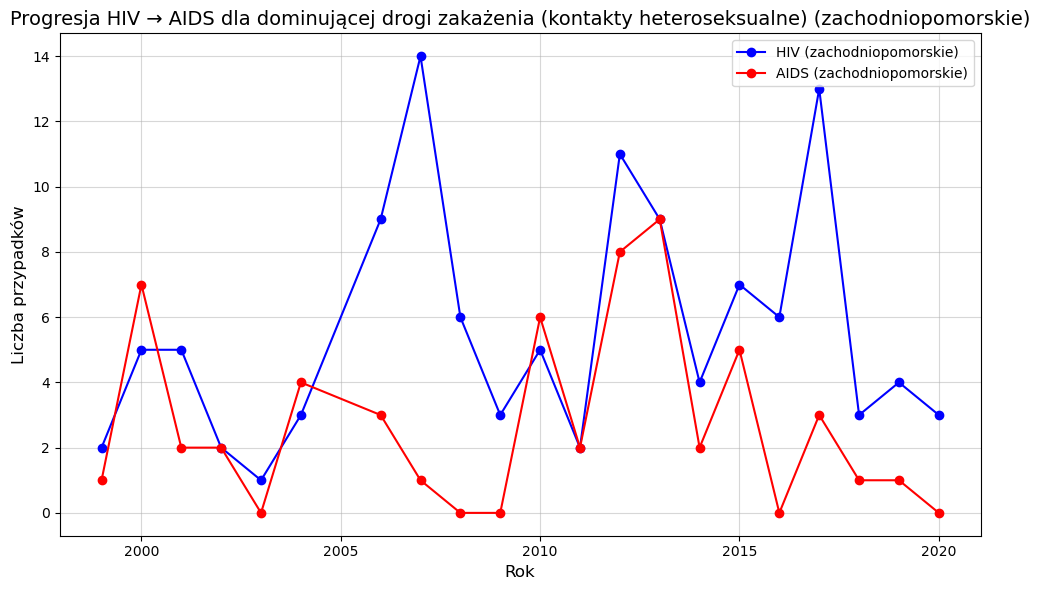

In [45]:
progression_data = {}

dominant_routes = {
    "kujawsko-pomorskie": "wstrzykiwanie narkotyków drogą dożylną",
    "zachodniopomorskie": "kontakty heteroseksualne"
}

for region, route in dominant_routes.items():
    hiv_route_time = hiv_data[(hiv_data['województwo'] == region) & (hiv_data['droga zakażenia'] == route)].groupby('rok rozpoznania')['licznik'].sum()
    aids_route_time = aids_data[(aids_data['województwo'] == region) & (aids_data['droga zakażenia'] == route)].groupby('rok rozpoznania')['licznik'].sum()

    aids_route_time = aids_route_time.reindex(hiv_route_time.index, fill_value=0)

    progression_data[region] = {
        'HIV': hiv_route_time,
        'AIDS': aids_route_time
    }

for region, data in progression_data.items():
    plt.figure(figsize=(10, 6))

    # Plot HIV and AIDS trends
    plt.plot(data['HIV'].index, data['HIV'].values, marker='o', label=f'HIV ({region})', color='blue')
    plt.plot(data['AIDS'].index, data['AIDS'].values, marker='o', label=f'AIDS ({region})', color='red')

    # Customize plot
    plt.title(f'Progresja HIV → AIDS dla dominującej drogi zakażenia ({dominant_routes[region]}) ({region})', fontsize=14)
    plt.xlabel('Rok', fontsize=12)
    plt.ylabel('Liczba przypadków', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

# WNIOSKI

Na początku analizy skupiono się na identyfikacji głównych dróg zakażenia HIV w Polsce. Wykresy radarowe pokazały, że heteroseksualne kontakty seksualne i dożylne zażywanie narkotyków były najczęstszymi drogami transmisji, co stanowiło punkt wyjścia do szczegółowych analiz regionalnych. Obserwacje te były kluczowe dla wyboru dalszych obszarów badań i podkreśliły znaczenie różnic w głównych drogach zakażenia.

Dalsze analizy przypadków HIV i AIDS w Polsce zidentyfikowały kluczowe różnice regionalne i udział głównych dróg zakażenia.

Celem badania było zrozumienie regionalnych różnic w przebiegu epidemii HIV i AIDS oraz identyfikacja głównych czynników wpływających na transmisję wirusa i rozwój AIDS. Analiza wykazała wyraźne różnice między województwami kujawsko-pomorskim i zachodniopomorskim, wskazując na potrzebę dostosowania działań profilaktycznych i leczniczych do specyficznych potrzeb każdego regionu.

W regionie kujawsko-pomorskim dominacja iniekcyjnego używania narkotyków jako drogi zakażenia znajduje odzwierciedlenie w bardzo podobnej tendencji w liczbie przypadków HIV i AIDS. Wynik ten podkreśla potrzebę skuteczniejszych interwencji w tej grupie ryzyka. W obwodzie zakhodniopomorskim główną drogą przenoszenia wirusa są kontakty heteroseksualne, co wskazuje na większą częstość występowania zakażeń i potrzebę interwencji mających na celu edukację i wsparcie osób zagrożonych.

Analiza danych znormalizowanych pod względem płci pokazuje, że w okręgu kujawsko-pomorskim mężczyźni dominują w przypadkach związanych z dożylnym przyjmowaniem narkotyków, podczas gdy w okręgu zachodniopomorskim główną drogą zakażenia są kontakty heteroseksualne między mężczyznami i kobietami. Różnice te podkreślają znaczenie lokalnie dostosowanych strategii profilaktycznych.

Analizy ewolucji zakażeń HIV i choroby AIDS poprzez główne drogi przenoszenia w obu województwach potwierdzają również, że brak odpowiedniego leczenia i wsparcia medycznego prowadzi do gorszych wyników zdrowotnych osób zakażonych. W województwie kujawsko-pomorskim używanie narkotyków w zastrzykach jest szczególnie związane z rozwojem AIDS, podczas gdy w województwie zachodniopomorskim kontakty heteroseksualne odgrywają kluczową rolę w tej dynamice.

Podsumowując, wyniki sugerują potrzebę wdrożenia zróżnicowanych strategii walki z HIV i AIDS, uwzględniających specyficzne potrzeby i uwarunkowania lokalnych społeczności. Regionalne różnice w dynamice zakażeń i progresji wirusa do AIDS powinny być podstawą do opracowania skuteczniejszych działań profilaktycznych i terapeutycznych, które pomogą zmniejszyć liczbę nowych zakażeń i poprawić jakość życia osób zakażonych.

